In [1]:
from load_auto import load_auto
from main_functions import *

In [2]:
# global variables
num_iterations = 1000
learning_rates = [1, 1e-1, 1e-2, 1e-3, 1e-4]
recording_iterations = [0, 200, 400, 600, 800, 1000]
hp_total_costs = []
all_total_costs = []

### Implementation on Normalized Data

In [3]:
# load the data
X_hp, X_hp_normalized, Y_hp = load_auto(False) # load the training data with just horsepower feature column
X_all, X_all_normalized, Y_all = load_auto() # load the training data with all features

In [4]:
# show the first 5 rows of the horsepower data and its shape
print(X_hp_normalized[:5,:])
print(X_hp_normalized.shape)

[[0.66328508]
 [1.57258478]
 [1.18288491]
 [1.18288491]
 [0.923085  ]]
(392, 1)


In [5]:
# show the first 5 rows of the all features data and its shape
print(X_all_normalized[:5,:])
print(X_all_normalized.shape)

[[ 1.48205303  1.07591459  0.66328508  0.61974833 -1.2836176  -1.6232409
  -0.71572638]
 [ 1.48205303  1.48683159  1.57258478  0.84225766 -1.4648516  -1.6232409
  -0.71572638]
 [ 1.48205303  1.18103289  1.18288491  0.53969206 -1.64608561 -1.6232409
  -0.71572638]
 [ 1.48205303  1.04724596  1.18288491  0.53616016 -1.2836176  -1.6232409
  -0.71572638]
 [ 1.48205303  1.02813354  0.923085    0.55499693 -1.82731962 -1.6232409
  -0.71572638]]
(392, 7)


#### Train and Evaluate on only horsepower feature

In [6]:
# train and record the costs for the horsepower data with different learning rates
for i in learning_rates:
    hp_weight, hp_b, hp_cost_list, hp_iterations = train_linear_model(X_hp_normalized, Y_hp, num_iterations, i)
    hp_total_costs.append(hp_cost_list)

Learning rate: 1
The cost for iteration 0 is 610.4738265306122
--------
The cost for iteration 200 is 578.413457111128
--------
The cost for iteration 400 is 574.2697931833326
--------
The cost for iteration 600 is 573.7342425625028
--------
The cost for iteration 800 is 573.6650249636588
--------
The cost for iteration 999 is 573.6560925427221
--------
Learning rate: 0.1
The cost for iteration 0 is 610.4738265306122
--------
The cost for iteration 200 is 23.943662938603108
--------
The cost for iteration 400 is 23.943662938603108
--------
The cost for iteration 600 is 23.943662938603108
--------
The cost for iteration 800 is 23.943662938603108
--------
The cost for iteration 999 is 23.943662938603108
--------
Learning rate: 0.01
The cost for iteration 0 is 610.4738265306122
--------
The cost for iteration 200 is 24.12533741672402
--------
The cost for iteration 400 is 23.943719212731196
--------
The cost for iteration 600 is 23.943662956034622
--------
The cost for iteration 800 is 23

In [7]:
# for each cost list in hp_total_costs print the last cost and its corresponding learning rate
for i in range(len(hp_total_costs)):
    print(f"Learning rate: {learning_rates[i]}")
    print(f"Final cost: {hp_total_costs[i][-1]}")
    print("------")

Learning rate: 1
Final cost: 573.6560925427221
------
Learning rate: 0.1
Final cost: 23.943662938603108
------
Learning rate: 0.01
Final cost: 23.943662938603108
------
Learning rate: 0.001
Final cost: 34.69324670149392
------
Learning rate: 0.0001
Final cost: 417.2733529593258
------


In [8]:
# find the index of the minimum cost, ignoring nan values
hp_min_idx = min(range(len(hp_total_costs)), key = lambda index: float('inf') if np.isnan(hp_total_costs[index][-1]) else hp_total_costs[index][-1])

# Get the minimum cost and corresponding learning rate
hp_min_cost = hp_total_costs[hp_min_idx][-1]
hp_min_learning_rate = learning_rates[hp_min_idx]

print(f"The minimum cost for the horsepower model is: {hp_min_cost}")
print(f"The learning rate for the minimum cost is: {hp_min_learning_rate}")

The minimum cost for the horsepower model is: 23.943662938603108
The learning rate for the minimum cost is: 0.1


In [9]:
# train the horse power model using the learning rate that gave the minumum cost to find the best parameters
hp_weight, hp_b, hp_cost_list, iterations = train_linear_model(X_hp_normalized, Y_hp, num_iterations, hp_min_learning_rate)


Learning rate: 0.1
The cost for iteration 0 is 610.4738265306122
--------
The cost for iteration 200 is 23.943662938603108
--------
The cost for iteration 400 is 23.943662938603108
--------
The cost for iteration 600 is 23.943662938603108
--------
The cost for iteration 800 is 23.943662938603108
--------
The cost for iteration 999 is 23.943662938603108
--------


In [10]:
print("The best parameters for the horsepower model are:")
print(f"Weight: {hp_weight}")
print(f"Offest: {hp_b}")

The best parameters for the horsepower model are:
Weight: [[-6.07562688]]
Offest: 23.44591836734693


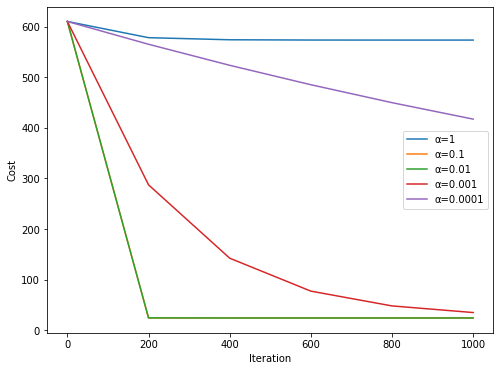

In [11]:
# show the plot for the horsepower model
show_plot(hp_total_costs, learning_rates, recording_iterations, "hp_plot")   

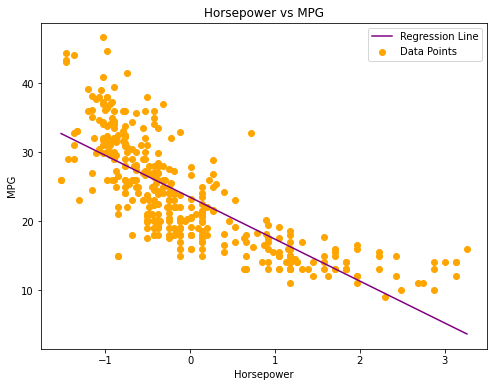

In [12]:
# scatter plot for horsepower model
plt.figure(figsize=(8, 6)) 
plt.scatter(X_hp_normalized, Y_hp, label='Data Points', color='orange')

hp_range = np.linspace(X_hp_normalized.min(), X_hp_normalized.max(), 100).reshape(-1, 1) # generate a range of horsepower values for plotting the regression line
predictions = predict(hp_range, hp_weight, hp_b) # calculate predicted values across the horsepower range

plt.plot(hp_range, predictions, color='purple', label='Regression Line')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Horsepower vs MPG')
plt.legend()
plt.savefig(f"scatter_plot.png",dpi=300)
plt.show()

#### Train and Evaluate on the all features

In [13]:
# train and record the costs with different learning rates
for i in learning_rates:
    all_weights, all_b, all_cost_list, all_iterations = train_linear_model(X_all_normalized, Y_all, num_iterations, i)
    all_total_costs.append(all_cost_list)

Learning rate: 1
The cost for iteration 0 is 610.4738265306122
--------
The cost for iteration 200 is inf
--------
The cost for iteration 400 is nan
--------
The cost for iteration 600 is nan
--------
The cost for iteration 800 is nan
--------
The cost for iteration 999 is nan
--------
Learning rate: 0.1
The cost for iteration 0 is 610.4738265306122
--------
The cost for iteration 200 is 10.880920893395123
--------
The cost for iteration 400 is 10.849335523674572
--------
The cost for iteration 600 is 10.847602334859872
--------
The cost for iteration 800 is 10.847489084705014
--------
The cost for iteration 999 is 10.847481499970431
--------
Learning rate: 0.01
The cost for iteration 0 is 610.4738265306122
--------
The cost for iteration 200 is 12.01777949102011
--------
The cost for iteration 400 is 11.451304226860376
--------
The cost for iteration 600 is 11.237669452195465
--------
The cost for iteration 800 is 11.108992624449682
--------
The cost for iteration 999 is 11.0275132709

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/Arins/Documents/Uni/Deep Learning for Image Analysis/Assignments/Assignment 1/Linear-Reg-Gradient-Descent-From-Scratch-In-NumPy/main_functions.py:46: RuntimeWarning: overflow encountered in square
  loss = (real_values - predictions) ** 2 # calculate the loss (error squared) for each example


In [14]:
# for each cost list in all_total_costs print the last cost and its corresponding learning rate
for i in range(len(all_total_costs)):
    print(f"Learning rate: {learning_rates[i]}")
    print(f"Final cost: {all_total_costs[i][-1]}")
    print("------")

Learning rate: 1
Final cost: nan
------
Learning rate: 0.1
Final cost: 10.847481499970431
------
Learning rate: 0.01
Final cost: 11.02751327099357
------
Learning rate: 0.001
Final cost: 22.450005771266934
------
Learning rate: 0.0001
Final cost: 391.30911896975357
------


In [15]:
# find the index of the minimum cost, ignoring nan values
all_min_idx = min(range(len(all_total_costs)), key = lambda index: float('inf') if np.isnan(all_total_costs[index][-1]) else all_total_costs[index][-1])

# Get the minimum cost and corresponding learning rate
all_min_cost = all_total_costs[all_min_idx][-1]
all_min_learning_rate = learning_rates[all_min_idx]

print(f"The minimum cost for the model using all features is: {all_min_cost}")
print(f"The learning rate for the minimum cost is: {all_min_learning_rate}")

The minimum cost for the model using all features is: 10.847481499970431
The learning rate for the minimum cost is: 0.1


In [16]:
# train the all features model using the learning rate that gave the minumum cost to find the best parameters
all_weights, all_b, all_cost_list, iterations = train_linear_model(X_all_normalized, Y_all, num_iterations, all_min_learning_rate)


Learning rate: 0.1
The cost for iteration 0 is 610.4738265306122
--------
The cost for iteration 200 is 10.880920893395123
--------
The cost for iteration 400 is 10.849335523674572
--------
The cost for iteration 600 is 10.847602334859872
--------
The cost for iteration 800 is 10.847489084705014
--------
The cost for iteration 999 is 10.847481499970431
--------


In [17]:
print("The best parameters for the model using all features are:")
print(f"Weights\n: {all_weights}")
print(f"Offest: {all_b}")

The best parameters for the model using all features are:
Weights
: [[-0.83976308]
 [ 2.07852947]
 [-0.6518016 ]
 [-5.49827114]
 [ 0.22221673]
 [ 2.76561046]
 [ 1.14850055]]
Offest: 23.445918367346934


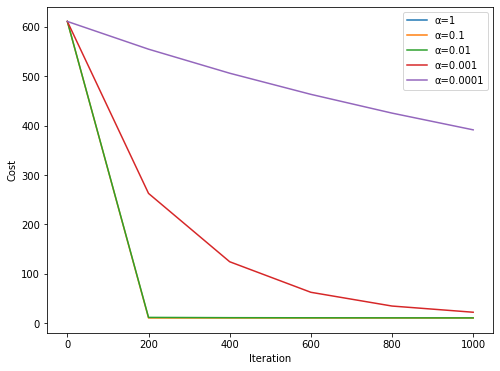

In [18]:
# show the plot for the model using all features
show_plot(all_total_costs, learning_rates, recording_iterations, "all_plot")   

### Implementation on Not Normalized Data
Models are also trained on unnormalized data to analyze the costs behavior.

In [19]:
# train on the not normalized horsepower data
hp_total_costs_not_normalized = []
for i in learning_rates:
    hp_weights, hp_b, hp_cost_list,iterations = train_linear_model(X_hp, Y_hp, num_iterations, i)
    hp_total_costs_not_normalized.append(hp_cost_list)

Learning rate: 1
The cost for iteration 0 is 610.4738265306122
--------
The cost for iteration 200 is nan
--------
The cost for iteration 400 is nan
--------
The cost for iteration 600 is nan
--------
The cost for iteration 800 is nan
--------
The cost for iteration 999 is nan
--------
Learning rate: 0.1
The cost for iteration 0 is 610.4738265306122
--------
The cost for iteration 200 is nan
--------
The cost for iteration 400 is nan
--------
The cost for iteration 600 is nan
--------
The cost for iteration 800 is nan
--------
The cost for iteration 999 is nan
--------
Learning rate: 0.01
The cost for iteration 0 is 610.4738265306122
--------
The cost for iteration 200 is nan
--------
The cost for iteration 400 is nan
--------
The cost for iteration 600 is nan
--------
The cost for iteration 800 is nan
--------
The cost for iteration 999 is nan
--------
Learning rate: 0.001
The cost for iteration 0 is 610.4738265306122
--------
The cost for iteration 200 is inf
--------
The cost for it

/Users/Arins/Documents/Uni/Deep Learning for Image Analysis/Assignments/Assignment 1/Linear-Reg-Gradient-Descent-From-Scratch-In-NumPy/main_functions.py:85: RuntimeWarning: invalid value encountered in subtract
  w = w - (learning_rate * gradient_w) # update weights by subtracting the product of learning rate and gradient with respect to weights from current weights
/Users/Arins/Documents/Uni/Deep Learning for Image Analysis/Assignments/Assignment 1/Linear-Reg-Gradient-Descent-From-Scratch-In-NumPy/main_functions.py:86: RuntimeWarning: invalid value encountered in scalar subtract
  b = b - (learning_rate * gradient_b) #update offset by subtracting the product of learning rate and gradient with respect to offset from current offset


In [20]:
# train on the not normalized data
all_total_costs_not_normalized = []
for i in learning_rates:
    all_weights, all_b, all_cost_list,iterations = train_linear_model(X_all, Y_all, num_iterations, i)
    all_total_costs_not_normalized.append(all_cost_list)

Learning rate: 1
The cost for iteration 0 is 610.4738265306122
--------
The cost for iteration 200 is nan
--------
The cost for iteration 400 is nan
--------
The cost for iteration 600 is nan
--------
The cost for iteration 800 is nan
--------
The cost for iteration 999 is nan
--------
Learning rate: 0.1
The cost for iteration 0 is 610.4738265306122
--------
The cost for iteration 200 is nan
--------
The cost for iteration 400 is nan
--------
The cost for iteration 600 is nan
--------
The cost for iteration 800 is nan
--------
The cost for iteration 999 is nan
--------
Learning rate: 0.01
The cost for iteration 0 is 610.4738265306122
--------
The cost for iteration 200 is nan
--------
The cost for iteration 400 is nan
--------
The cost for iteration 600 is nan
--------
The cost for iteration 800 is nan
--------
The cost for iteration 999 is nan
--------
Learning rate: 0.001
The cost for iteration 0 is 610.4738265306122
--------
The cost for iteration 200 is nan
--------
The cost for it